# **Introduction**

With the growing popularity of youtube, amazon, netflix and more internet-hosting video sites, everyone has probably heard the term "web series". Web series are like TV shows, with the exception that each episode (or "webisode") broadcast online rather than on your television. The objective of this notebook is **to represent information graphically, highlighting patterns and trends in data and helping to gain quick insights**. The dataset is collected from Kaggle, which contains  more than 3000 series that were scrapped from 100 web pages.

The dataset consists of 9 variables:
* **Unnamed: 0**: index number
* **Name**: series name
* **Year**: year(s) a series broadcast
* **Tv Certificate**: TV-Certificate a series rated        
* **Duration per episode**: per series length  
* **Genre**: series theme category                
* **Ratings**: series ratings in 1-10                
* **Actor/Actress**: casts          
* **Votes**: how many individuals vote for a series     

In [1]:
import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/thriller-crime-action/AllThrillerSeriesList.csv


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sp

df = pd.read_csv('/kaggle/input/thriller-crime-action/AllThrillerSeriesList.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)


df.head()

,Name,Year,Tv Certificate,Duration per episode,Genre,Ratings,Actor/Actress,Votes
0,Andor,2022–,TV-14,40 min,"Action, Adventure, Drama",8.4,"Diego Luna, Kyle Soller, Stellan Skarsgård, G...","82,474"
1,The Peripheral,2022–,TV-MA,NaN,"Drama, Mystery, Sci-Fi",8.0,"Chloë Grace Moretz, Gary Carr, Jack Reynor, J...","34,768"
2,The Walking Dead,2010–2022,TV-MA,44 min,"Drama, Horror, Thriller",8.1,"Andrew Lincoln, Norman Reedus, Melissa McBrid...","988,666"
3,Criminal Minds,2005–,TV-14,42 min,"Crime, Drama, Mystery",8.1,"Kirsten Vangsness, Matthew Gray Gubler, A.J. ...","198,262"
4,Breaking Bad,2008–2013,TV-MA,49 min,"Crime, Drama, Thriller",9.5,"Bryan Cranston, Aaron Paul, Anna Gunn, Betsy ...","1,872,005"


# **Exploratory Data Analysis**

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3256 entries, 0 to 3255
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  3256 non-null   object 
 1   Year                  3256 non-null   object 
 2   Tv Certificate        1306 non-null   object 
 3   Duration per episode  2391 non-null   object 
 4   Genre                 3256 non-null   object 
 5   Ratings               3256 non-null   float64
 6   Actor/Actress         3256 non-null   object 
 7   Votes                 3256 non-null   object 
dtypes: float64(1), object(7)
memory usage: 203.6+ KB
None


* The dataset consists of 3256 observations.

In [4]:
# Check duplicate values
df.duplicated().sum()

0

In [5]:
for col in df.columns:
    print('{}: \n{}\n'.format(col, df[col].unique()))

Name: 
['Andor' 'The Peripheral' 'The Walking Dead' ... 'Reputasyon'
 'Berlin Break' 'Vitamin Z']

Year: 
['2022– ' '2010–2022' '2005– ' '2008–2013' '2017–2020' '2018– ' '2016– '
 '2017– ' '2011– ' '2005–2020' '1999– ' '2003– ' '2013– ' '2020– '
 '2011–2019' '2014–2019' '2015– ' '2017–2022' '2002–2008' '2004–2010'
 '2021– ' '1990– ' '2009–2017' '1993–2018' '2008–2014' '2010– '
 '2017–2021' '2014– ' 'II) (2020–2023' '2010–2017' '2006–2013' '2022'
 '2005–2017' '2015–2019' '2008–2015' '2010–2015' '2012– ' '1971–2003'
 '2013–2016' '2015–2018' '1989–2013' '2011–2020' '2000–2015' '2011–2016'
 '2019– ' '2014–2023' '2011–2017' '2017–2019' '2003–2010' '2019–2023'
 '2015–2017' '2001–2010' '2013–2018' '2004–2019' '1990–1991' '2014–2017'
 '2014–2020' '2013–2020' '2012–2021' '1959–1964' '2013–2015' '2012–2018'
 '2020–2022' '2018–2020' '2018–2022' '2019–2021' '1997–2003' '2010–2019'
 '1993–2005' '2016–2019' 'I) (2021– ' 'II) (2006–2010' '1999–2004'
 '2006–2007' '2020–2023' '2002–2012' 'I) (2013–2016

In [6]:
# Remove the space in front of each value in Tv Certificate column
df['Tv Certificate'].replace(' ', '', regex=True, inplace=True)


# Standardize the space in the Genre column
df['Genre'].replace(" ",'', regex=True, inplace=True)
df['Genre'] = df['Genre'].apply(lambda x : x.center((len(x))+2, ' '))
df['Genre'].replace(',',' ', regex=True, inplace=True)


# Correct the data type of the Votes column
df['Votes'].replace(',','', regex=True, inplace=True)
df['Votes'] = df['Votes'].str.extract('(\d+)').astype('int') # Extract Number from String


# Correct the data type of the Duration per episode column
df['Duration per episode'] = df['Duration per episode'].str.extract('(\d+)')
df['Duration per episode'] = pd.to_numeric(df['Duration per episode'])

,Column,Missing_Count,Percentage(%)
0,Name,0,0.00
1,Year,0,0.00
2,Tv Certificate,1950,59.89
3,Duration per episode,865,26.57
4,Genre,0,0.00
5,Ratings,0,0.00
6,Actor/Actress,0,0.00
7,Votes,0,0.00


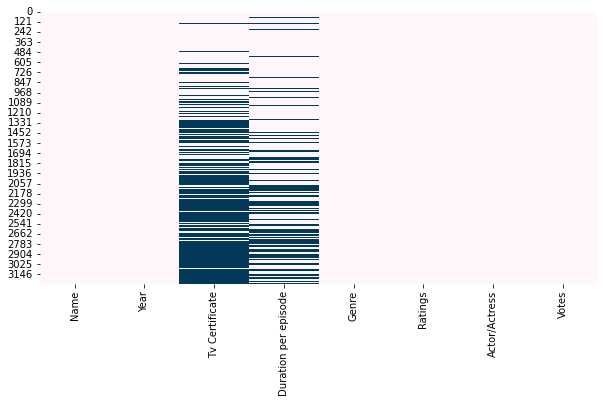

In [7]:
# Visualize the missing values / NAN
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap=plt.cm.PuBu)


# Check the percentage of missing value / NAN 
table = pd.DataFrame()
table['Column'] = df.columns
table['Missing_Count'] = [df[col].isnull().sum() for col in df.columns]
table['Percentage(%)'] = [round((df[col].isnull().sum() / df.shape[0])*100, 2) for col in df.columns]

table

In [8]:
# Convert nan to 'Unrated' in TV certificate column
# Descriptions for Tv Certificate: https://www.spectrum.net/support/tv/tv-and-movie-ratings-descriptions
df['Tv Certificate'].fillna('Unrated', axis=0, inplace=True)

# Remove missing values in the Duration per episode column as it is only 26.57% missing value
df.dropna(subset=['Duration per episode'], axis=0, inplace=True)

In [9]:
# Create a Year Span column
start = df['Year'].str.extract(r"(\d{4})").astype('int').squeeze()
df['Year Span'] = start.apply(lambda x : 2022-x)


# Check if the column is created correctly
print('Year of the earliest movie broadcasted: {}\n'.format(start.min()))
print('The broadcast year span for this movie: {}\n'.format(df['Year Span'].max()))

Year of the earliest movie broadcasted: 1931

The broadcast year span for this movie: 91



In [10]:
# Create a Total Number of Actor/Actress column
df['Total Actor/Actress'] = df['Actor/Actress'].apply(lambda x : x.count(',')+1)


# Check if the column is created correctly
print('The Actor/Actress in the first row: {}\n'.format(df.loc[0, 'Actor/Actress']))
print('Number of Actor/Actress in the first row: {}\n'.format(df.loc[0, 'Total Actor/Actress']))

The Actor/Actress in the first row:  Diego Luna, Kyle Soller, Stellan Skarsgård, Genevieve O'Reilly

Number of Actor/Actress in the first row: 4



In [11]:
# Create Rating Category column - 5 categories
# 0-2: Very low
# 2-4: Low
# 4-6: Average
# 6-8: High
# 8-10: Very high
df['Category'] = pd.cut(df['Ratings'], 5, labels=['Very low', 'Low', 'Average', 'High', 'Very high'])

In [12]:
# Drop columns
df.drop(['Year', 'Actor/Actress'], axis=1, inplace=True)

In [13]:
df.head()

,Name,Tv Certificate,Duration per episode,Genre,Ratings,Votes,Year Span,Total Actor/Actress,Category
0,Andor,TV-14,40.0,Action Adventure Drama,8.4,82474,0,4,Very high
2,The Walking Dead,TV-MA,44.0,Drama Horror Thriller,8.1,988666,12,4,High
3,Criminal Minds,TV-14,42.0,Crime Drama Mystery,8.1,198262,17,4,High
4,Breaking Bad,TV-MA,49.0,Crime Drama Thriller,9.5,1872005,14,4,Very high
5,Dark,TV-MA,60.0,Crime Drama Mystery,8.7,384702,5,4,Very high


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2391 entries, 0 to 3254
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Name                  2391 non-null   object  
 1   Tv Certificate        2391 non-null   object  
 2   Duration per episode  2391 non-null   float64 
 3   Genre                 2391 non-null   object  
 4   Ratings               2391 non-null   float64 
 5   Votes                 2391 non-null   int64   
 6   Year Span             2391 non-null   int64   
 7   Total Actor/Actress   2391 non-null   int64   
 8   Category              2391 non-null   category
dtypes: category(1), float64(2), int64(3), object(3)
memory usage: 235.2+ KB


# **Data Vizualization**

In [15]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (11,6)

## 1. Univariate Analysis

In [16]:
df['Name'].value_counts()

The Twilight Zone               4
Your Honor                      4
Ghost Stories                   3
The Invisible Man               3
Teenage Mutant Ninja Turtles    3
                               ..
Breathe                         1
Bulletproof                     1
Get Even                        1
Date a Live                     1
Berlin Break                    1
Name: Name, Length: 2335, dtype: int64

* Series with the **same name do not appear more than 4 times** in the dataset.

Text(0, 0.5, 'Count')

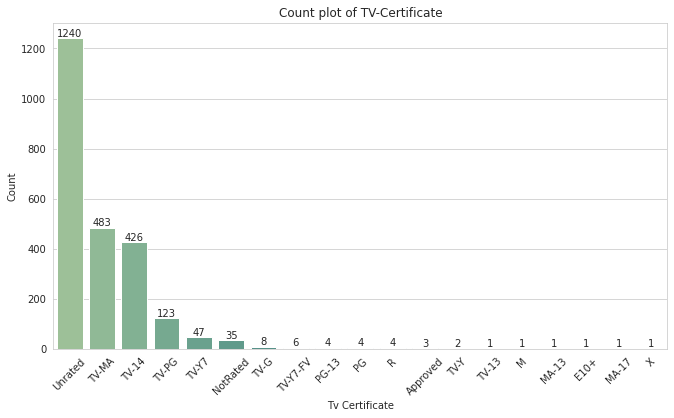

In [17]:
ax = sns.countplot(x=df['Tv Certificate'], order=df['Tv Certificate'].value_counts().index, palette='crest')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of TV-Certificate', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.ylabel('Count')

* **Most Series** are **Unrated**, followed by **TV-MA**, **TV-14** and **TV-PG**.

Text(0.5, 1.0, 'Distribution of Duration per episode')

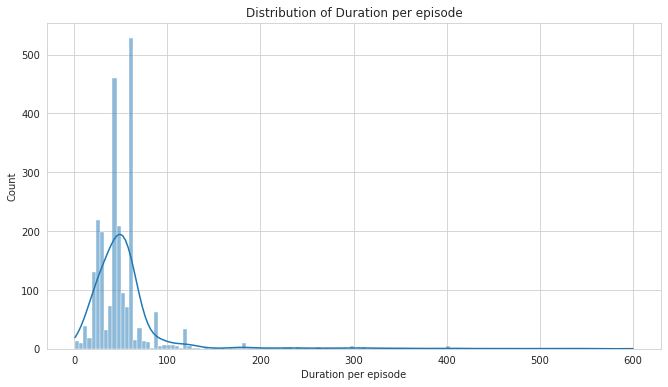

In [18]:
sns.histplot(x=df['Duration per episode'], kde=True)
plt.title('Distribution of Duration per episode')

* The distribution of Duration per episode is **right skewed**.
* This suggests that there are **more series** with **shorter episode durations**.
* Most values are **clustered around the left tail** of the distribution, with the **longer right tail**.
* (mode < median < mean)

(-0.5, 399.5, 199.5, -0.5)

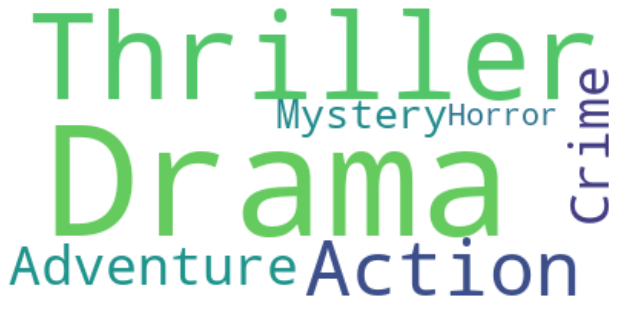

In [19]:
from wordcloud import WordCloud, STOPWORDS

text = df['Genre'].values

wordcloud = WordCloud(collocations=False, background_color='white').generate(str(text))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

* Series genre such as **Thriller**, **Drama** and **Action** appear more frequently in the dataset.

Text(0.5, 1.0, 'Distribution of Ratings')

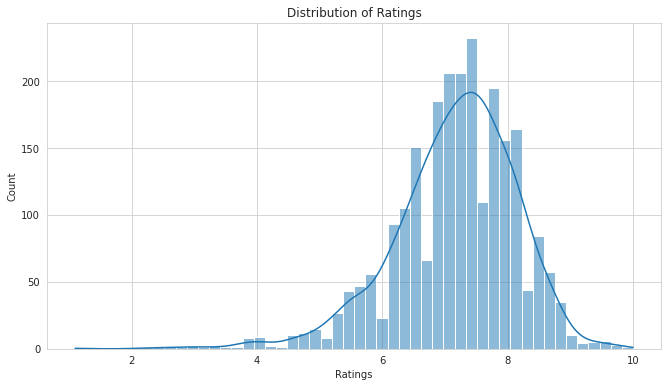

In [20]:
sns.histplot(x=df['Ratings'], kde=True)
plt.title('Distribution of Ratings')

* The distribution of Ratings is **left skewed**.
* This indicates that there are **more series** that get **higher ratings**.
* Most values are **clustered around the right tail** of the distribution, with the **longer left tail**.
* (mean < median < mode)

Text(0, 0.5, 'Count')

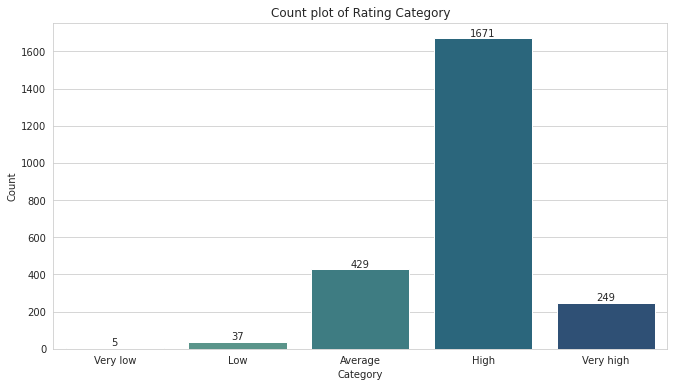

In [21]:
ax = sns.countplot(x=df['Category'], palette='crest')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of Rating Category', fontsize=12)
plt.ylabel('Count')

* Compared to other rating categories, the **most series** receive **high ratings**.

Text(0.5, 1.0, 'Distribution of Votes')

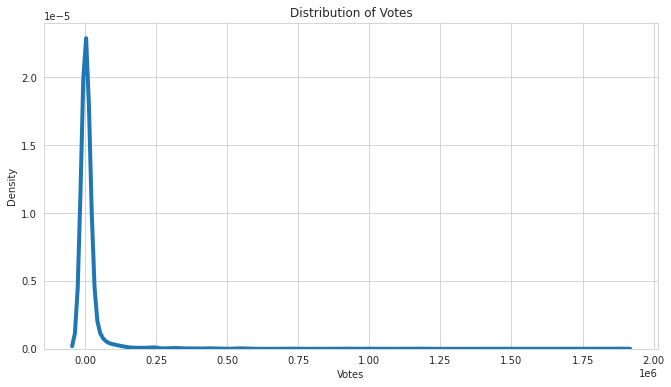

In [22]:
sns.kdeplot(x=df['Votes'], linewidth=4)
plt.title('Distribution of Votes')

* The distribution of Votes is **right skewed**.
* This means that **fewer series** with **higher vote counts**.

Text(0.5, 1.0, 'Distribution of Year Span')

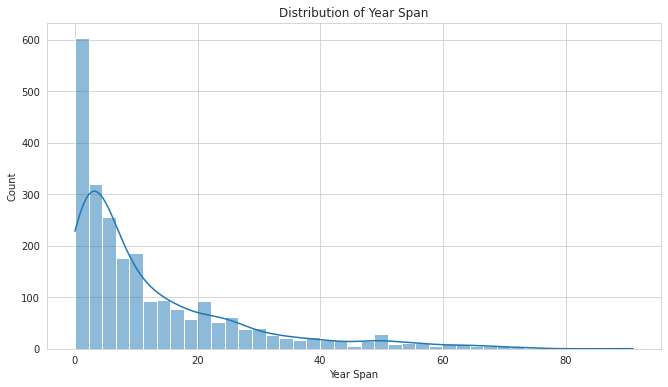

In [23]:
sns.histplot(x=df['Year Span'], kde=True)
plt.title('Distribution of Year Span')

* The distribution of Year Span is **right skewed**.
* This implies that there are **more recently broadcasted series**.

Text(0, 0.5, 'Count')

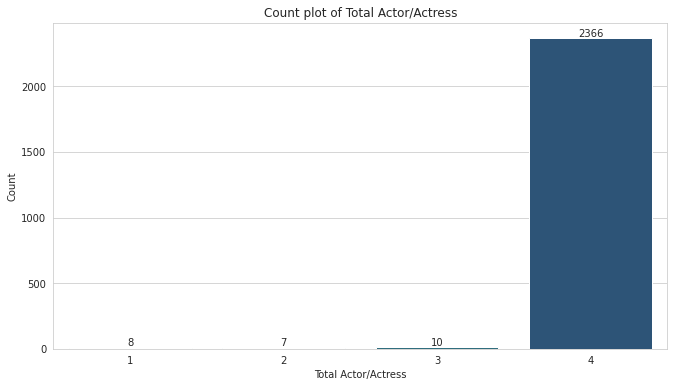

In [24]:
ax = sns.countplot(x=df['Total Actor/Actress'], palette='crest')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of Total Actor/Actress', fontsize=12)
plt.ylabel('Count')

* The number of actors per series varies from 1 to 4.
* **Most of the series** have a **total of 4 actors**.

## 2. Bivariate Analysis

Text(0.5, 1.0, 'Scatter plot of Votes and Ratings')

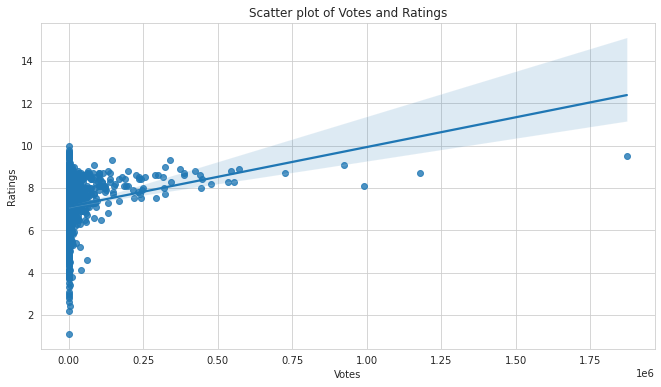

In [25]:
sns.regplot(x='Votes', y='Ratings', data=df)
plt.title('Scatter plot of Votes and Ratings', fontsize=12)

* Ratings and Votes have a **weak positive strong** relationship.
* This suggests that ratings may be higher when there are more votes.

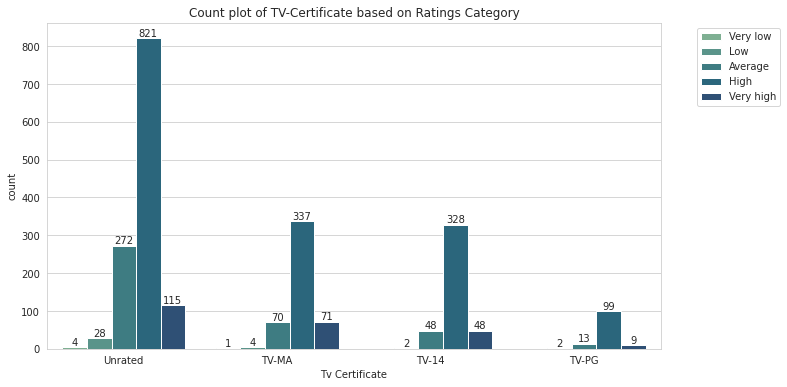

In [26]:
df1 = df[(df['Tv Certificate']=='Unrated') | (df['Tv Certificate']=='TV-MA') | 
         (df['Tv Certificate']=='TV-14') | (df['Tv Certificate']=='TV-PG')]

ax = sns.countplot(x='Tv Certificate', hue='Category', data=df1, order=df1['Tv Certificate'].value_counts().index, palette='crest')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of TV-Certificate based on Ratings Category', fontsize=12)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')

* For all selected TV-Certificates, most series received **high ratings** compared to other ratings categories

Text(0.5, 1.0, 'Box plot of Duration per episode based on Ratings Category')

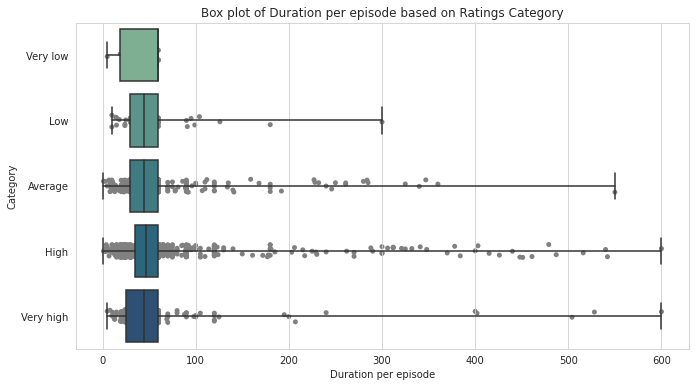

In [27]:
ax = sns.boxplot( x='Duration per episode', y='Category',data=df, whis=[0, 100], palette='crest')
sns.stripplot(x='Duration per episode', y='Category', color='0.50', data=df, zorder=0, ax=ax)
plt.title('Box plot of Duration per episode based on Ratings Category', fontsize=12)

* The distribution of Duration per episode is **right skewed** for all ratings categories **except very low ratings**.

Text(0.5, 0, 'Genre')

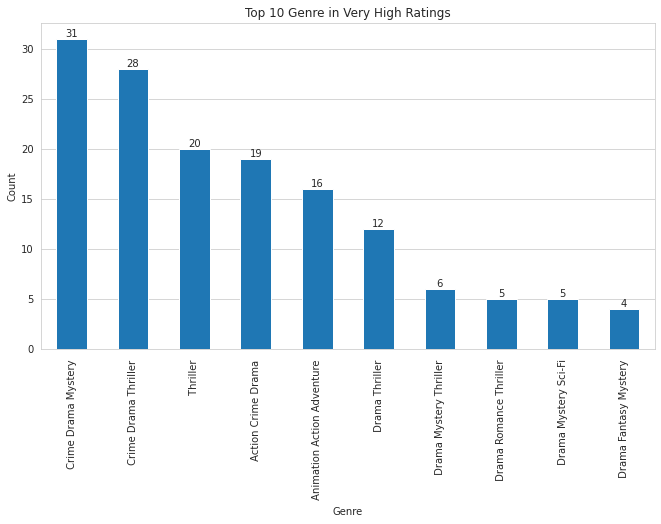

In [28]:
df2 = df[df['Category'] == 'Very high']
df3 = df2['Genre'].value_counts().head(10)

ax = df3.plot(kind='bar')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 Genre in Very High Ratings', fontsize=12)
plt.grid(axis='x')
plt.ylabel('Count')
plt.xlabel('Genre')

* The **Crime, Drama, Mystery** genres has the **highest number** of **very high-rated** series, followed by **Crime, Drama, Thriller** and **Thriller**.

Text(0.5, 0, 'Genre')

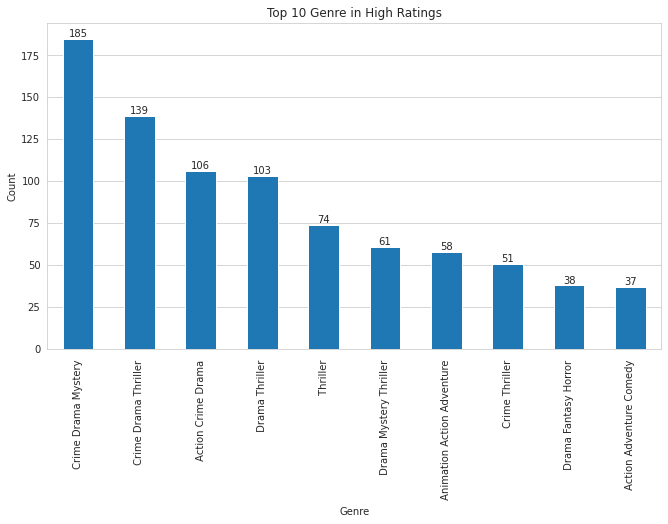

In [29]:
df4 = df[df['Category'] == 'High']
df5 = df4['Genre'].value_counts().head(10)

ax = df5.plot(kind='bar')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 Genre in High Ratings', fontsize=12)
plt.grid(axis='x')
plt.ylabel('Count')
plt.xlabel('Genre')

* The **Crime, Drama, Mystery** genres has the **highest number** of **high-rated** series, followed by **Crime, Drama, Thriller** and **Action, Crime, Drama**

Text(0.5, 1.0, 'Scatter plot of Year Span and Ratings')

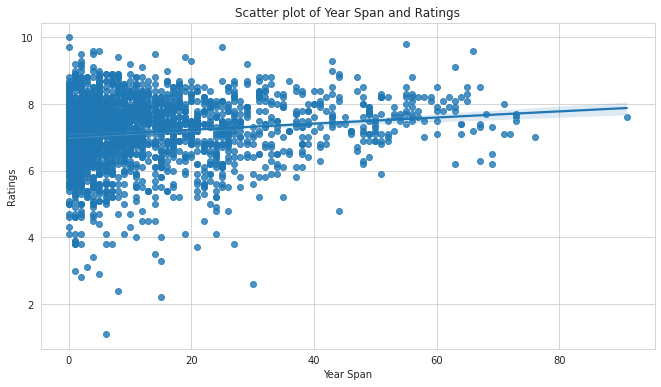

In [30]:
sns.regplot(x='Year Span', y='Ratings', data=df)
plt.title('Scatter plot of Year Span and Ratings', fontsize=12)

* Ratings and Year Span have a **weak positive strong** relationship.
* This indicates that ratings may be higher when the span of years is longer.

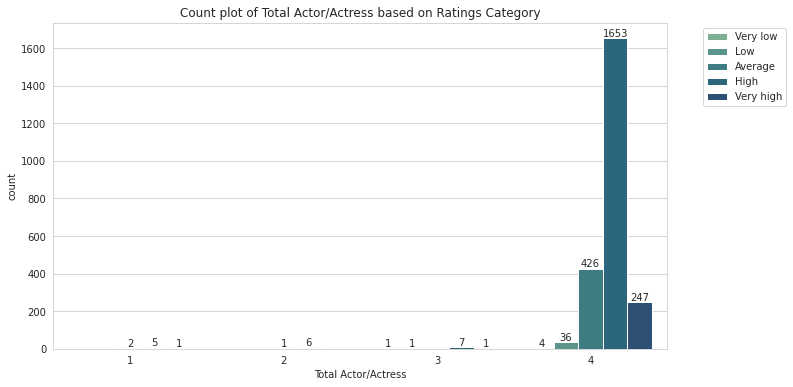

In [31]:
ax = sns.countplot(x='Total Actor/Actress', hue='Category', data=df, palette='crest')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of Total Actor/Actress based on Ratings Category', fontsize=12)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')

* Series with **a total of 4 actors** are **more likely** to get better ratings like **average**, **high** and **very high**.

## 3. Multivariate Analysis

<AxesSubplot:>

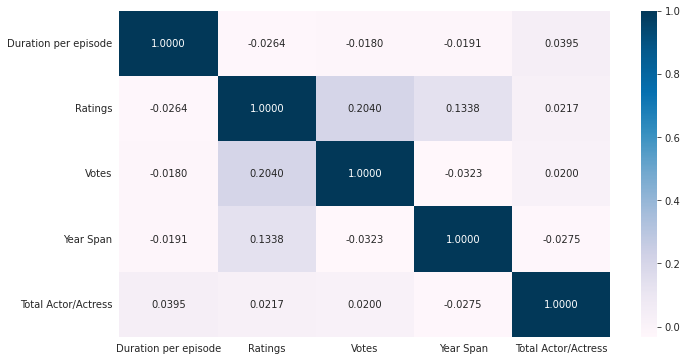

In [32]:
sns.heatmap(df.corr(), cbar=True, fmt='.4f', annot=True, cmap=plt.cm.PuBu)

* Ratings and Votes have a **weak positive relationship**.
* Ratings and Year Span have **weak positive relationship**.

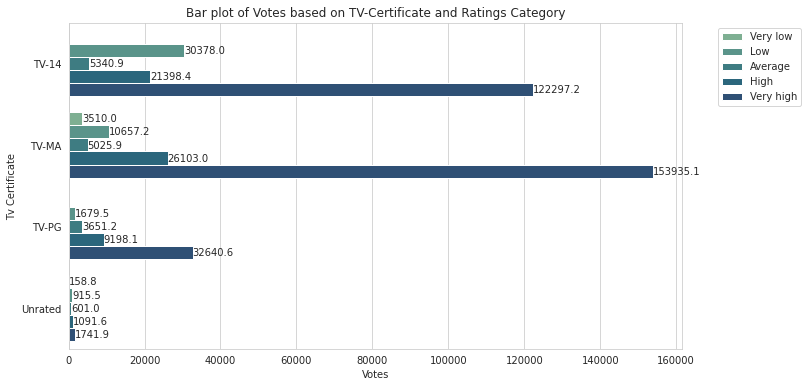

In [33]:
ax = sns.barplot(x='Votes', y='Tv Certificate', hue='Category', data=df1, ci=None, palette='crest')
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')
plt.title('Bar plot of Votes based on TV-Certificate and Ratings Category', fontsize=12)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')

* The **TV-MA** received the **highest mean votes** for **high** and **very high** ratings series than any other TV-Certificates.
* The **TV-14** received the **second highest mean votes** for **high** and **very high** ratings series

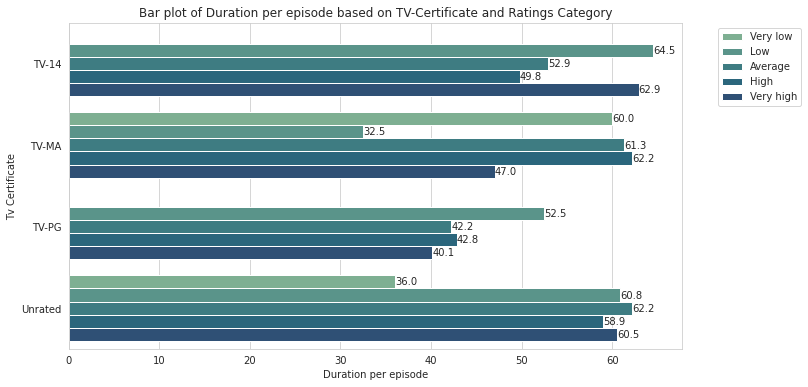

In [34]:
ax = sns.barplot(x='Duration per episode', y='Tv Certificate', hue='Category', data=df1, ci=None, palette='crest')
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')
plt.title('Bar plot of Duration per episode based on TV-Certificate and Ratings Category', fontsize=12)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')

* The mean **TV-MA** episode duration is **62.2 minutes** for **high-rated** series and **47.0 minutes** for **vey high-rated** series.
* The mean **TV-14** episode duration is **62.9 minutes** for **high-rated** series and **49.8 minutes** for **vey high-rated** series.

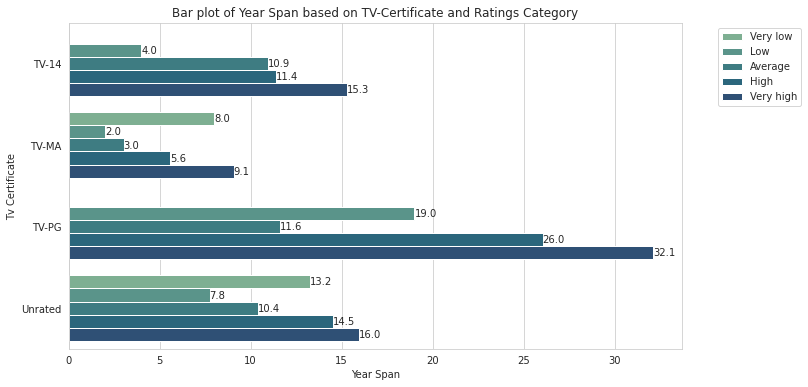

In [35]:
ax = sns.barplot(x='Year Span', y='Tv Certificate', hue='Category', data=df1, ci=None, palette='crest')
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')
plt.title('Bar plot of Year Span based on TV-Certificate and Ratings Category', fontsize=12)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')

* The mean year span of **TV-MA** is **5.6 years** for **high-rated** series and **9.1 years** for **vey high-rated** series.
* The mean year span of **TV-14** is **11.4 years** for **high-rated** series and **15.3 years** for **vey high-rated** series.

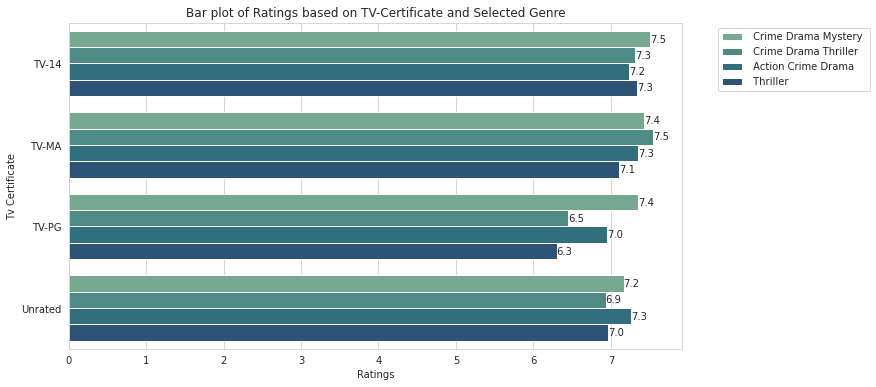

In [36]:
df6 = df1[(df1['Genre'] == ' Crime Drama Mystery ') | (df1['Genre'] == ' Crime Drama Thriller ') 
          | (df1['Genre'] == ' Action Crime Drama ') | (df1['Genre'] == ' Thriller ')]

ax = sns.barplot(x='Ratings', y='Tv Certificate', hue='Genre', data=df6, ci=None, palette='crest')
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')
plt.title('Bar plot of Ratings based on TV-Certificate and Selected Genre', fontsize=12)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')

* For all selected genres, **TV-MA** and **TV-17** have mean ratings **above 7.0**.

# **Conclusion**

The following series are more likely to receive high or very high ratings:
* **TV Certificate**: TV-MA and TV-14 
* **Duration per episode**: 47.0 to 62.9 minutes
* **Year Span**: 5.6 t0 15.3 years
* **Genre**: (Crime, Drama, Mystery), (Crime, Drama, Thriller), (Action, Crime, Drama) and (Thriller)